# eArth Samvartha Foundation Challenge


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Step 4: Read csv file into pandas and look at some values**

In [27]:
# Define column names by hand for easier clean up.
columnnames=['SerialNumber', 'Tehsil', 'Block',
                        'Village', 'FullName', 'FathersFullName',
                        'Age', 'Sex', 'PhoneNumber',
                        'IDProof', 'IDNumber', 'ArrivalDate',
                        'SourceCity', 'SourceCheckup', 'Skill', 'YrsExp',
                        'OtherSkills', 'CompanyName', 'Comments']


# use pd.read_csv to read the csv. Skip the first row, and use the column names above
### FILL CODE HERE

df=pd.read_csv('/content/testdata.csv')
df_new = df.rename(columns={ '1':'SerialNumber','2':'Tehsil','3':'Block','4':'Village','5':'FullName','6':'FathersFullName','7':'Age','8':'Sex','9':'PhoneNumber','10':'IDProof','11':'IDNumber','12':'ArrivalDate','13':'SourceCity','14':'SourceCheckup','15':'Skill','16':'YrsExp','17':'OtherSkills','18':'CompanyName','19':'Comments'})
### look at the dataframe using .head()
df_new.head()


,SerialNumber,Tehsil,Block,Village,FullName,FathersFullName,Age,Sex,PhoneNumber,IDProof,IDNumber,ArrivalDate,SourceCity,SourceCheckup,Skill,YrsExp,OtherSkills,CompanyName,Comments
0,1,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,15.0,MALE,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,7 MONTH,NaN,NaN,NaN
1,2,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,22.0,MALE,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,5 MONTHS,NaN,NaN,NaN
2,3,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,20.0,F,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
3,4,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
4,5,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN


In [28]:

print("Current Unique values in Sex (and counts):")
print(df_new.Sex.unique())
df_new['Sex'].nunique()




Current Unique values in Sex (and counts):
['MALE' 'F' 'M' 'FEMALE' 'पु0' 'म0' 'ड' nan 'म']


8

In [0]:
import numpy as np

**CLEANING BAD DATA IN "SEX" COLUMN**

Updated unique values in Sex:
M    662
F     45
U      2
Name: Sex, dtype: int64


Text(0.5, 1.02, 'sex variation')

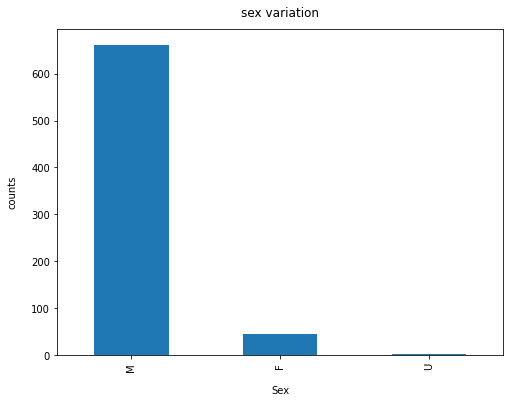

In [30]:
ds = df_new.copy() # Make changes in a new dataframe

# Replace bad values in Sex using the following table
# "MALE" -> "M"
# "FEMALE" -> "F"
# "पु0" -> "M"
# "म0" -> "F"
# "म" -> "F"
# # Replace bad values, nans or Unknown values with Unknown -> U
# nan -> "U"
# "ड" -> "U"




print("Updated unique values in Sex:")
### FILL CODE HERE


ds.replace(["MALE","पु0","M"], "M",inplace=True) 
ds.replace(["FEMALE", "म0","म"],"F",inplace=True) 
ds.replace(["nan","ड"], "U",inplace=True)
print(ds.Sex.value_counts())
ds['Sex'].value_counts().plot(kind='bar',figsize=(8, 6))  
plt.xlabel("Sex", labelpad=14)
plt.ylabel("counts", labelpad=14)
plt.title("sex variation", y=1.02)
  

**Step 7: Lets look at data and see what else can we fix**

In [31]:
### use the .head() command to show the table again
ds.head()

,SerialNumber,Tehsil,Block,Village,FullName,FathersFullName,Age,Sex,PhoneNumber,IDProof,IDNumber,ArrivalDate,SourceCity,SourceCheckup,Skill,YrsExp,OtherSkills,CompanyName,Comments
0,1,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,15.0,M,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,7 MONTH,NaN,NaN,NaN
1,2,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,22.0,M,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,5 MONTHS,NaN,NaN,NaN
2,3,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,20.0,F,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
3,4,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
4,5,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN


**CHANGING ALL NAMES TO BAHADURPUR**

In [32]:
print("Block names before cleaning")
### FILL CODE HERE FOR THE OUTPUT BELOW
ds.Block.value_counts()

Block names before cleaning


BAHADURPUR     447
बहादुरपुर       80
BHADHUR PUR     69
BAHADUR PUR     61
BHADHUR         11
BHADHURPUR       9
BHADURPUR        7
Bhadhur pur      6
Bahadur pur      5
Bhadhurpur       4
BAHDURPR         3
Bahadur Pur      3
Bahdhur          2
BAHDURPUR        2
Bhadhur          1
Name: Block, dtype: int64

In [33]:
### Fill code here to replace all "Block" values with "BAHADURPUR"
print("Block names after cleaning:")
ds.replace(["बहादुरपुर","BHADHUR PUR","BAHADUR PUR","BHADHUR","BHADHURPUR","BHADURPUR","Bhadhur pur","Bahadur pur","Bhadhurpur","Bahadur Pur","BAHDURPR","Bahdhur","BAHDURPUR","Bhadhur"],"BAHADURPUR",inplace=True)

### Fill code to show values and counts
ds.Block.value_counts()

Block names after cleaning:


BAHADURPUR    710
Name: Block, dtype: int64

**Let's look at possible city names**

In [34]:
### Fill code here to print all city names
col_values=ds['SourceCity'].values.ravel()
value=pd.unique(col_values)
print(value) 
print(ds['SourceCity'].value_counts())


['MUMBAI' 'Prayagraj' 'DELHI' 'INDORE' 'FARIDABAD' 'HYDRABAD' 'GUJRAT'
 'MADHYA PRADESH' 'ANDHRA PRADESH' 'GURGAON' 'AHAMADABAD' 'KANPUR'
 'ALIGARH' 'GONDA' nan 'AMRITSAR' 'RAJASTHAN' 'BOMBAY' 'BALLABHGARH'
 'NOIDA' 'AHEMADABAD' 'NAGPUR' 'MATHURA' 'AHAMDABAD' 'BHIMANDI' 'THANE'
 'PUNE' 'SURAT' 'HAPUR' 'SAHARANPUR' 'HARYANA' 'BHIWNDI' 'AHMEDABAD'
 'TELANGANA' 'HARIYANA' 'BHIWANDI' 'JALGAUV' 'RAJSTHAN' 'MAHARASTRA'
 'KERALA' 'BRODARA' 'BANGOLORE' 'KERLA' 'MHARSATRA' 'LUCKNOW' 'GUDGAWA'
 'NAGH PUR' 'MHARASTRA' 'AMDABAD' 'BANGLOR' 'JHASI' 'PUNA' 'SAHARAN PUR'
 'HARAYAN' 'CHNADI GHAR' 'GAZIYABAD' 'NASIK' 'VASAI MUMBAI' 'BEGLORE'
 'ULWAY MUMBAI' 'मुम्बई' 'मुम्बई भिवडी' 'सूरत' 'हैदराबाद' 'तेलंगाना'
 'लुधियाना' 'हापुड' 'मुम्बई मानखुर्द एकतानगर' 'गुजरात गोधरा' 'थाने' 'वसई'
 'बसई' 'अन्धेरी बेस्ट' 'पुणे' 'गुजरात' 'केरल' 'MUMBAI CST' 'AHAMADNAGAR'
 'BELAUR' 'NIGOJ' 'MMBAI' 'MAHARSHTRA' 'fnYyh' 'Fkkus' 'eqEcbZ' 'POONA'
 'MUMABAI' 'HENFRABAD' 'HAIDRABAD' 'BANGLORE' 'RAJESTHA' 'SOLAPUR' 'AGRA'
 'JAMM

# **CHALLENGE 1**

**FIXING CITY NAMES**

Mumbai                 329
Gujarat                 45
Delhi                   37
Ahmedabad               29
Bhiwandi                24
Prayagraj               22
Ballabhgarh             16
Rajasthan               14
Kerela                  13
Pune                    12
Hyderabad               12
Agra                    10
Bangalore               10
Maharashtra              9
Telangana                9
Surat                    9
unknown                  8
Kanpur                   8
Vasai                    7
Haryana                  6
HARIYANA                 6
Nagpur                   6
MAHARSHTRA               4
Thane                    4
Gurugram                 4
Andra Pradesh            4
Ludhiana                 4
Gonda                    4
Solapur                  4
Saharanpur               4
Faridabad                4
Madhya Pradesh           3
Jhansi                   2
Ekta Nagar Mankhurd      2
Aligarh                  2
Nashik                   2
Amritsar                 2
H

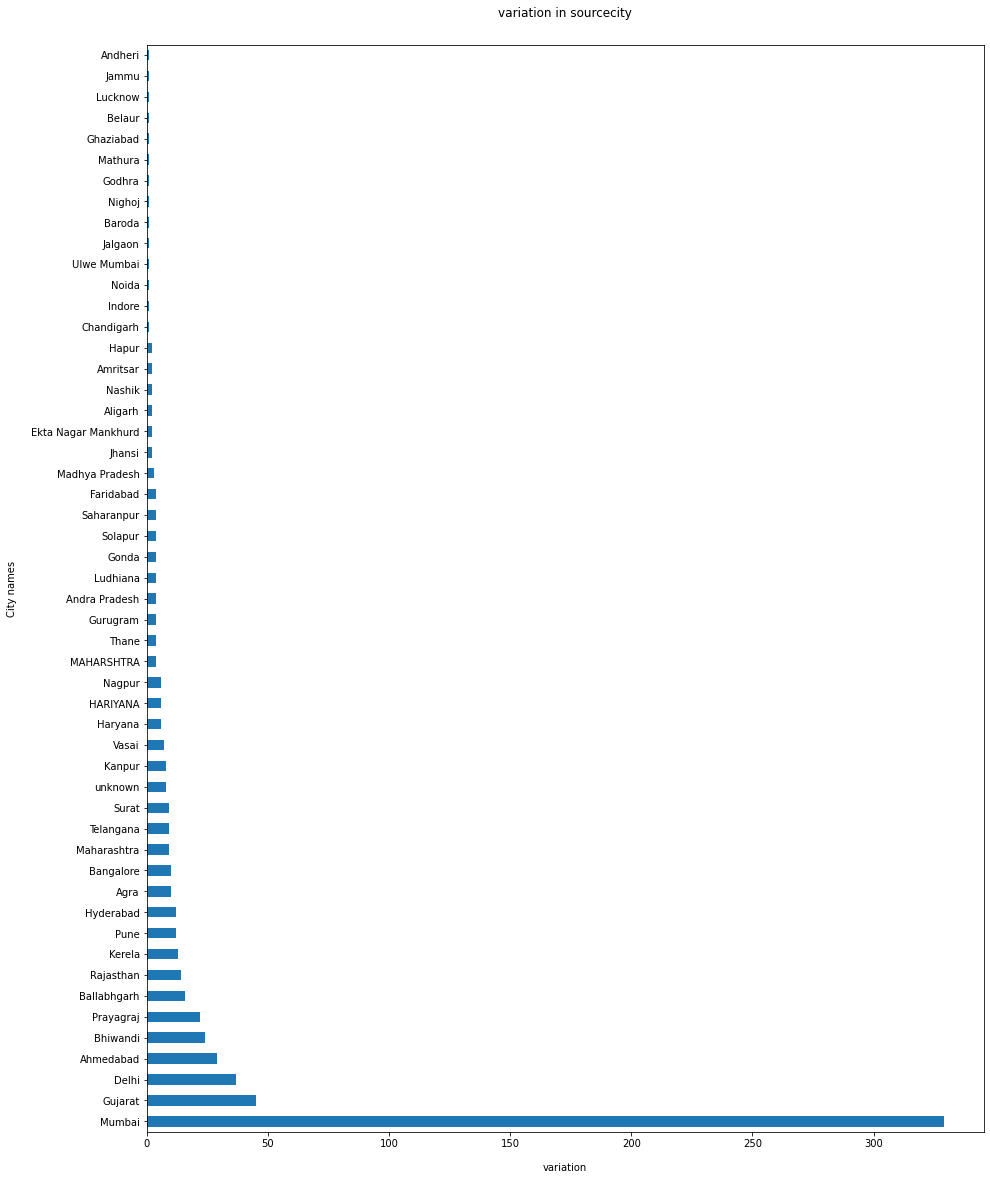

In [35]:
### Option 1: Add code (or code cells) here to replace city names manually.
### Option 2: (Preferred) Add code (or code cells) here to upload file cityreplacement.csv 
### and clean city names using code
ds.replace(["HAIDRABAD"," Hyderabad","HYDRABAD","हैदराबाद","HENFRABAD"],"Hyderabad",inplace=True)
ds.replace(["MUMBAI","मुम्बई","MUMBAI CST","MMBAI","MUMABAI","BOMBAY"],"Mumbai",inplace=True)
ds.replace(["DELHI"],"Delhi",inplace=True)
ds.replace(["INDORE"],"Indore",inplace=True)
ds.replace(["FARIDABAD"],"Faridabad",inplace=True)
ds.replace(["GUJRAT","गुजरात","GUJRAAT"],"Gujarat",inplace=True)
ds.replace(["MADHYA PRADESH"],"Madhya Pradesh",inplace=True)
ds.replace(["ANDHRA PRADESH"],"Andra Pradesh",inplace=True)
ds.replace(["BANGLORE","BANGOLORE","BANGLOR","BEGLORE","BANGLORE","BEGOLOR"],"Bangalore",inplace=True)
ds.replace(["AHAMADABAD","AHEMADABAD","AHAMDABAD","AHMEDABAD","AMDABAD","AHMADABAD","अहमदाबाद","AHAMADNAGAR"],"Ahmedabad",inplace=True)
ds.replace(["KANPUR","कानपुर"],"Kanpur",inplace=True)
ds.replace(["GURGAON","GUDGAWA"],"Gurugram",inplace=True)
ds.replace(["RAJASTHAN","RAJSTHAN","RAJESTHA"],"Rajasthan",inplace=True)
ds.replace(["AGARA","AGRA"],"Agra",inplace=True)
ds.replace(["POONA","पुणे","PUNA","PUNE"],"Pune",inplace=True)
ds.replace(["JAMMU"],"Jammu",inplace=True)
ds.replace(["fnYyh","Fkkus","eqEcbZ","nan"],"unknown",inplace=True)
ds.replace(["NIGOJ"],"Nighoj",inplace=True)
ds.replace(["केरल","KERALA","KERLA"],"Kerela",inplace=True)
ds.replace(["VASAI MUMBAI","वसई","बसई"],"Vasai",inplace=True)
ds.replace(["BELAUR"],"Belaur",inplace=True)
ds.replace(["SAHARANPUR","SAHARAN PUR"],"Saharanpur",inplace=True)
ds.replace(["अन्धेरी बेस्ट"],"Andheri",inplace=True)
ds.replace(["थाने","THANE"],"Thane",inplace=True)
ds.replace(["हापुड","HAPUR"],"Hapur",inplace=True)
ds.replace(["लुधियाना"],"Ludhiana",inplace=True)
ds.replace(["तेलंगाना","TELANGANA"],"Telangana",inplace=True)
ds.replace(["सूरत","SURAT"],"Surat",inplace=True)
ds.replace(["NASIK"],"Nashik",inplace=True)
ds.replace(["GAZIYABAD"],"Ghaziabad",inplace=True)
ds.replace(["CHNADI GHAR"],"Chandigarh",inplace=True)
ds.replace(["HARAYAN","HARYANA"],"Haryana",inplace=True)
ds.replace(["JHASI"],"Jhansi",inplace=True)
ds.replace(["NAGH PUR","NAGPUR"],"Nagpur",inplace=True)
ds.replace(["LUCKNOW"],"Lucknow",inplace=True)
ds.replace(["BRODARA"],"Baroda",inplace=True)
ds.replace(["JALGAUV"],"Jalgaon",inplace=True)
ds.replace(["BHIWANDI","BHIWNDI","BHIMANDI","मुम्बई भिवडी"],"Bhiwandi",inplace=True)
ds.replace(["MATHURA"],"Mathura",inplace=True)
ds.replace(["NOIDA"],"Noida",inplace=True)
ds.replace(["BALLABHGARH"],"Ballabhgarh",inplace=True)
ds.replace(["AMRITSAR"],"Amritsar",inplace=True)
ds.replace(["GONDA"],"Gonda",inplace=True)
ds.replace(["ALIGARH"],"Aligarh",inplace=True)
ds.replace(["मुम्बई मानखुर्द एकतानगर"],"Ekta Nagar Mankhurd",inplace=True)
ds.replace(["ULWAY MUMBAI"],"Ulwe Mumbai",inplace=True)
ds.replace(["MAHARASTRA","MHARSATRA","MHARASTRA"],"Maharashtra",inplace=True)
ds.replace(["गुजरात गोधरा"],"Godhra",inplace=True)
ds.replace(["SOLAPUR"],"Solapur",inplace=True)

print(ds.SourceCity.value_counts())
ds['SourceCity'].value_counts().plot(kind='barh', figsize=(15, 20))
plt.xlabel("variation", labelpad=14)
plt.ylabel("City names", labelpad=14)
plt.title("variation in sourcecity", y=1.02);



## **CHALLENGE 2**

**CLEANING OF "YRSEXP" COLUMN WITH HELP OF REGULAR EXPRESSION**


In [36]:


#ds['YrsExp'
ds.replace(["nan"],"unknown",inplace=True)
ds.replace(["7 MONTH","5 MONTHS","6 MONTHS","2 MONTHS","7 MONTHS","4 MONTHS","06 MONTHS","04 MONTHS","03 MONTHS","02 MONTHS","3 MOTH","5 MONTH","6 Month","2 MONTH","3 MONTH","11 MONTHS","6 MONTH","8 MONTH","4 MONTH","3 माह","2 माह","6माह","3माह","8 माह","5 माह","6 माह","4माह","5माह","2MONTHS","6MONTH","8 MONTHS","6 MTH"],"1",inplace=True)

ds['YrsExp'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
ds['YrsExp'] = ds['YrsExp'].astype('float64')
#for value in ds['YrsExp']:
#ds['YrsExp']

ds['YrsExp']
result=[]
for value in ds['YrsExp']:
  
  if value > 10:
    result.append(10)
  else:
    result.append(0)
ds['YrsExp']=result
ds['YrsExp']



0      0
1      0
2      0
3      0
4      0
      ..
705    0
706    0
707    0
708    0
709    0
Name: YrsExp, Length: 710, dtype: int64

# **CHALLENGE 3** 

In [38]:
pip install fuzzywuzzy

**IMPORTING FUZZYWUZZY LIBRARY FOR STRING MATCHING**

In [39]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [0]:
def checker(wrong_options,correct_options):
    names_array=[]
    ratio_array=[]    
    for wrong_option in wrong_options:
        if wrong_option in correct_options:
           names_array.append(wrong_option)
           ratio_array.append('100')
        else:   
            x=process.extractOne(wrong_option,correct_options,scorer=fuzz.token_set_ratio)
            names_array.append(x[0])
            ratio_array.append(x[1])
    return names_array,ratio_array

In [0]:
df_Original_List=pd.read_csv("/content/cityreplacements.csv",usecols=["Current Value"])
df_To_beMatched=pd.read_csv("/content/cityreplacements.csv",usecols=["New Value"])

In [0]:
str2Match = df_To_beMatched['New Value'].fillna('######').tolist()
strOptions =df_Original_List['Current Value'].fillna('######').tolist()

In [0]:
name_match,ratio_match=checker(str2Match,strOptions)
df1 = pd.DataFrame()
df1['String1']=pd.Series(str2Match)
df1['String2']=pd.Series(name_match)
df1['match_ratio']=pd.Series(ratio_match)
df1.to_csv('matched_names.csv')

**RESULT OF CHALLENGE 3**

In [44]:
df1.head(20)

,String1,String2,match_ratio
0,Mumbai,MUMBAI,100
1,Prayagraj,Prayagraj,100
2,Delhi,DELHI,100
3,Indore,INDORE,100
4,Faridabad,FARIDABAD,100
5,Hyderabad,HYDRABAD,94
6,Gujarat,GUJRAT,92
7,Madhya Pradesh,MADHYA PRADESH,100
8,Andhra Pradesh,ANDHRA PRADESH,100
9,Gurugram,GURGAON,67
